In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
import numpy as np
import os
from google.colab import drive

In [2]:
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
cwd="/content/drive/MyDrive/Colab Notebooks/For NTI/ AWS Machine Learning Foundations"
os.chdir(cwd)

In [28]:
df=pd.read_excel('default of credit card clients.xls',header=1)
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,female,university,married,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,female,university,single,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,female,university,single,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,female,university,married,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,male,university,married,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


## Data preparation 

In [29]:
df.drop(['ID'],axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   LIMIT_BAL                   30000 non-null  int64 
 1   SEX                         30000 non-null  object
 2   EDUCATION                   29669 non-null  object
 3   MARRIAGE                    29677 non-null  object
 4   AGE                         30000 non-null  int64 
 5   PAY_0                       30000 non-null  int64 
 6   PAY_2                       30000 non-null  int64 
 7   PAY_3                       30000 non-null  int64 
 8   PAY_4                       30000 non-null  int64 
 9   PAY_5                       30000 non-null  int64 
 10  PAY_6                       30000 non-null  int64 
 11  BILL_AMT1                   30000 non-null  int64 
 12  BILL_AMT2                   30000 non-null  int64 
 13  BILL_AMT3                   30000 non-null  in

In [6]:
df['EDUCATION'].value_counts()

university         14030
graduate school    10585
high school         4916
others               124
0                     14
Name: EDUCATION, dtype: int64

In [7]:
df['MARRIAGE'].value_counts()

single     15964
married    13659
0             54
Name: MARRIAGE, dtype: int64

In [8]:
df['SEX'].value_counts()

female    18112
male      11888
Name: SEX, dtype: int64

In [30]:
#df.dropna(inplace=True)
df['EDUCATION'].fillna('university', inplace=True)
df['MARRIAGE'].fillna('single', inplace=True)
df['EDUCATION'].replace(0,'university',regex=True,inplace=True)
df['MARRIAGE'].replace(0, 'single',regex=True,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   LIMIT_BAL                   30000 non-null  int64 
 1   SEX                         30000 non-null  object
 2   EDUCATION                   30000 non-null  object
 3   MARRIAGE                    30000 non-null  object
 4   AGE                         30000 non-null  int64 
 5   PAY_0                       30000 non-null  int64 
 6   PAY_2                       30000 non-null  int64 
 7   PAY_3                       30000 non-null  int64 
 8   PAY_4                       30000 non-null  int64 
 9   PAY_5                       30000 non-null  int64 
 10  PAY_6                       30000 non-null  int64 
 11  BILL_AMT1                   30000 non-null  int64 
 12  BILL_AMT2                   30000 non-null  int64 
 13  BILL_AMT3                   30000 non-null  in

In [31]:
df=pd.get_dummies(df,columns=['SEX','MARRIAGE'], drop_first=True)
df=pd.get_dummies(df,columns=['EDUCATION'])
df.head()

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,SEX_male,MARRIAGE_single,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_others,EDUCATION_university
0,20000,24,2,2,-1,-1,-2,-2,3913,3102,...,0,0,0,1,0,0,0,0,0,1
1,120000,26,-1,2,0,0,0,2,2682,1725,...,1000,0,2000,1,0,1,0,0,0,1
2,90000,34,0,0,0,0,0,0,29239,14027,...,1000,1000,5000,0,0,1,0,0,0,1
3,50000,37,0,0,0,0,0,0,46990,48233,...,1100,1069,1000,0,0,0,0,0,0,1
4,50000,57,-1,0,-1,0,0,0,8617,5670,...,9000,689,679,0,1,0,0,0,0,1


In [32]:
df.rename(columns = {'default payment next month':'target'}, inplace = True)

####deal with outlier

In [40]:
df.drop(['PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6','SEX_male','MARRIAGE_single','EDUCATION_graduate school',
         'EDUCATION_high school','EDUCATION_others','EDUCATION_university'],axis=1).describe()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,target
count,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,35.518833,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,9.528019,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,21.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,28.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,34.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,41.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,267.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


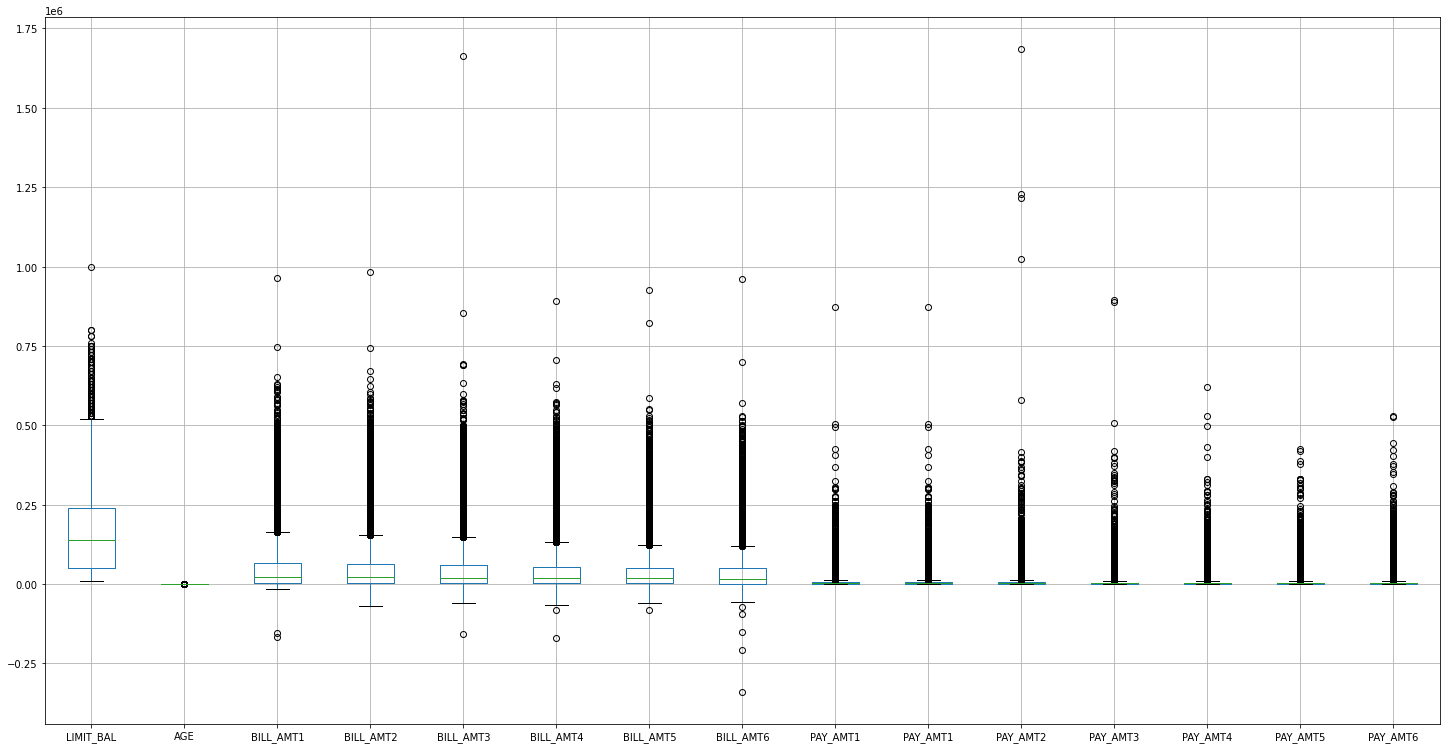

In [42]:
df.boxplot(column=['LIMIT_BAL','AGE','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4'
  ,'BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6'],figsize=(25,13))

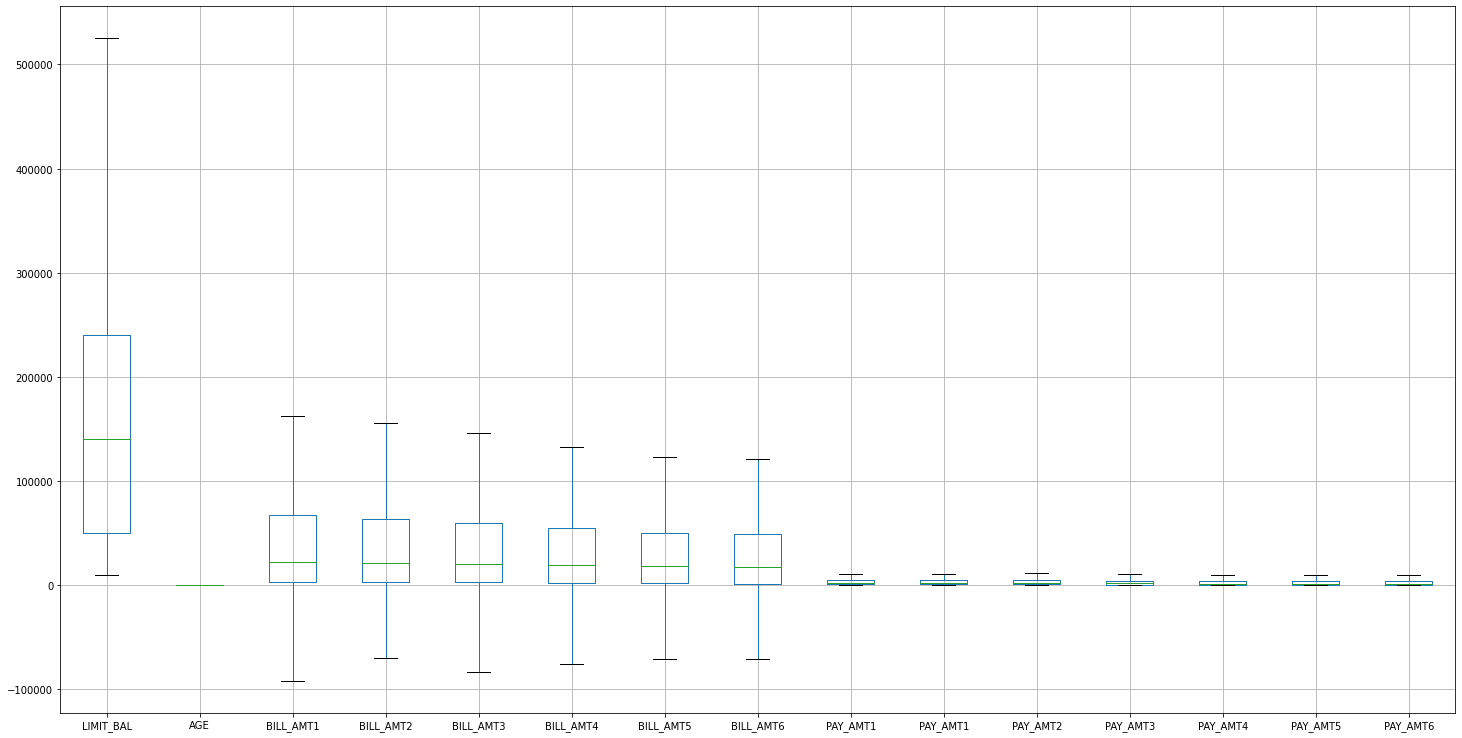

In [12]:
c=['LIMIT_BAL','AGE','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4'
  ,'BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']
for i in c:
  q1=df[i].quantile(0.25)
  q3=df[i].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 -(1.5 * iqr) 
  upper_bound = q3 +(1.5 * iqr)
  df[i] = np.where(df[i] <lower_bound, lower_bound,df[i])
  df[i] = np.where(df[i] >upper_bound, upper_bound,df[i])

df.boxplot(column=['LIMIT_BAL','AGE','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4'
  ,'BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6'],figsize=(25,13))

####cheack balance in data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc7dcc6a730>,
      dtype=object)

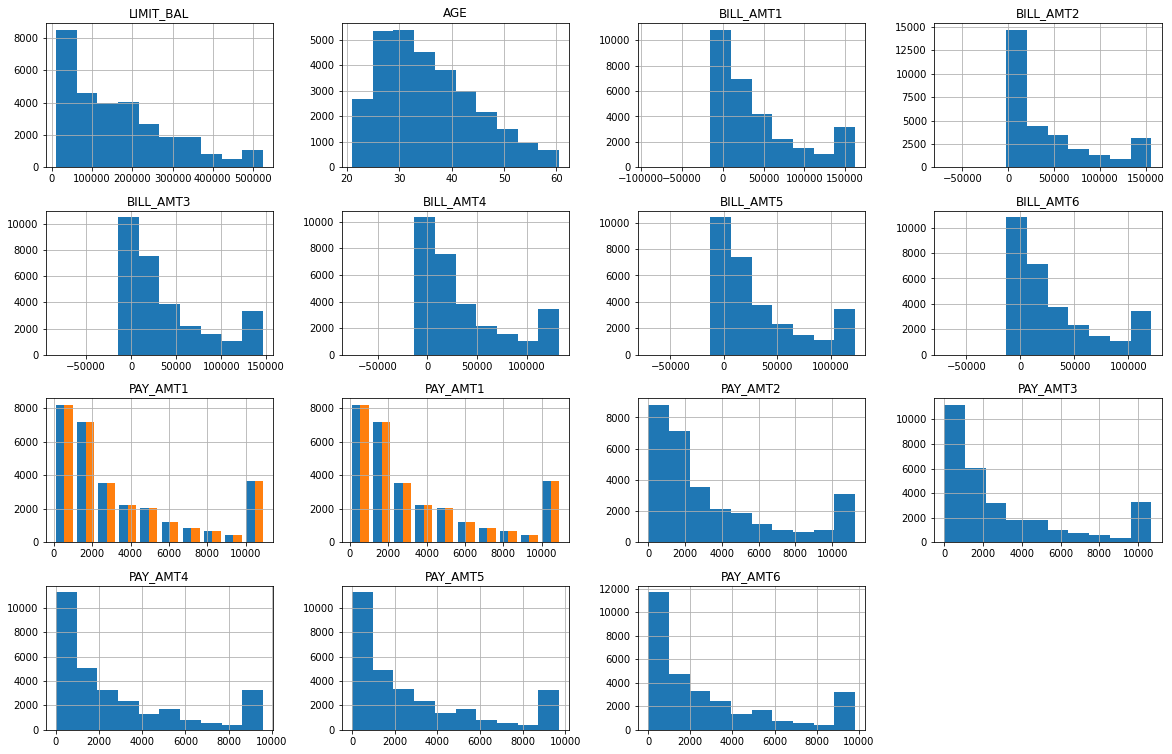

In [19]:
df.hist(column=['LIMIT_BAL','AGE','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4'
  ,'BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6'],figsize=(20,13))

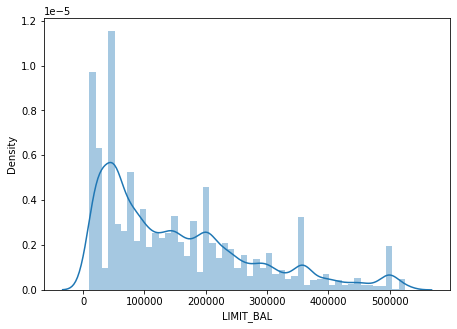

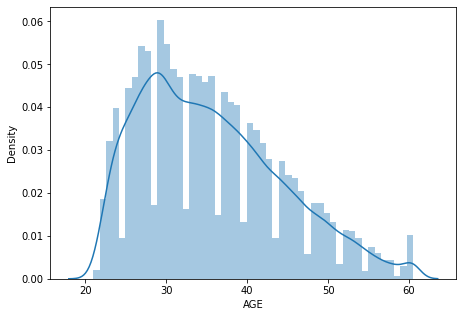

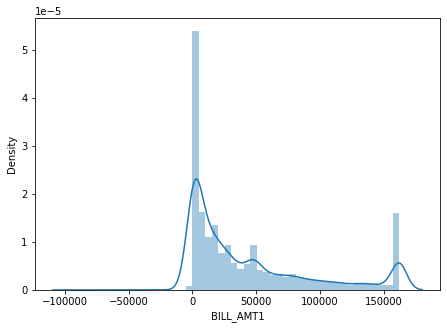

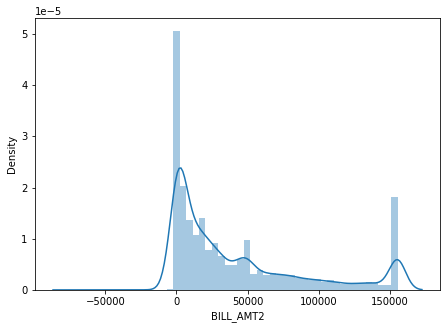

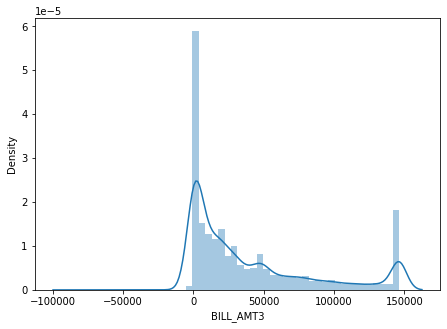

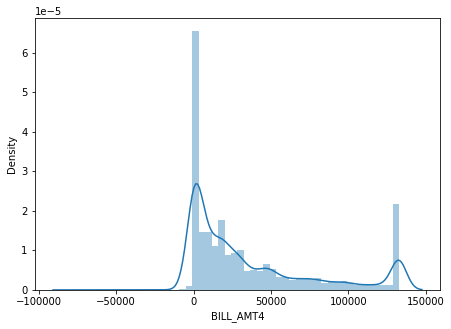

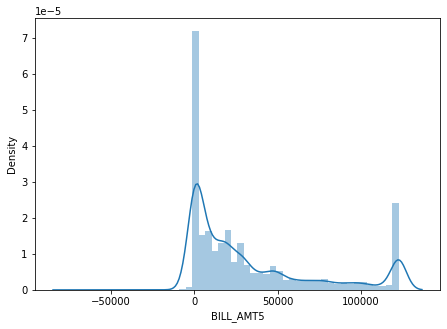

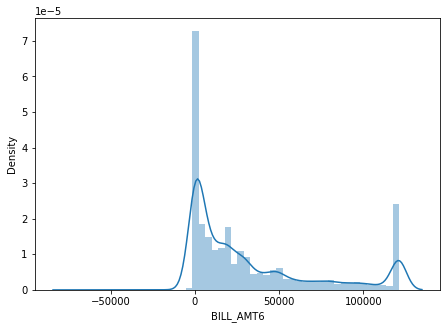

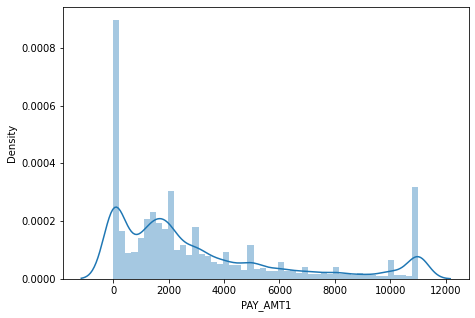

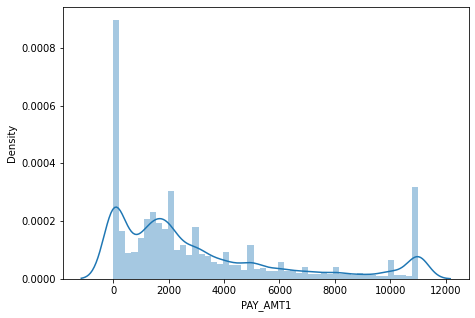

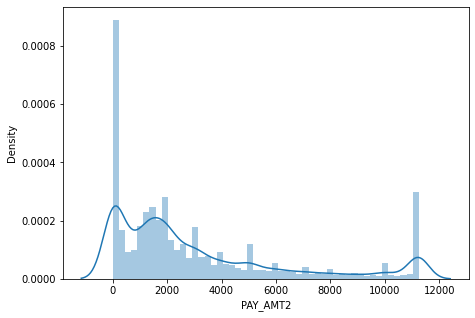

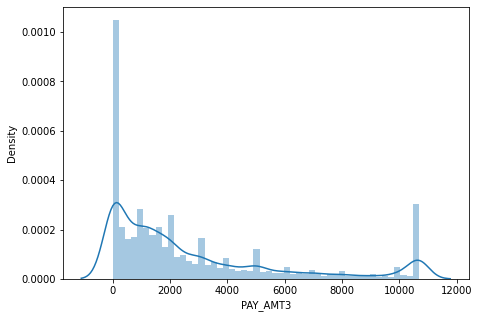

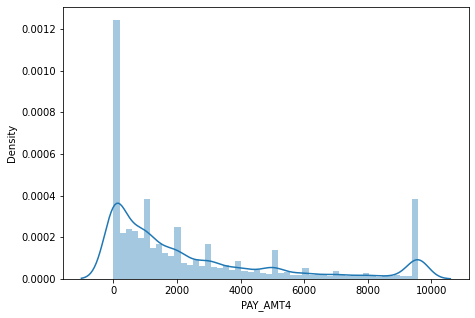

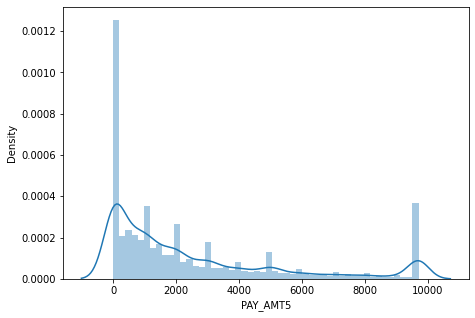

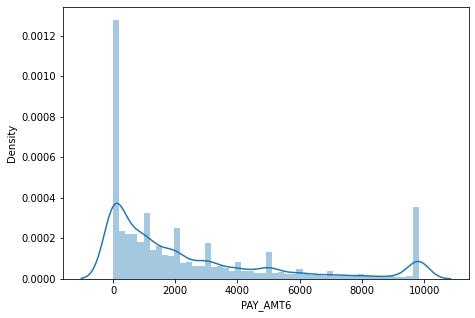

In [26]:
import warnings 
for x in c: 
    warnings.filterwarnings('ignore') 
    plt.figure(figsize=(16,5)) 
    plt.subplot(1,2,1) 
    sns.distplot(df[x]) 
     
    plt.show()

##### deal with unbalanced in data using SMOTE

In [33]:
from sklearn.model_selection import train_test_split

X=df.drop('target',axis=1)
y=df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101, shuffle= True, stratify=df['target'])

In [14]:
y_train.value_counts()

0    18691
1     5309
Name: target, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


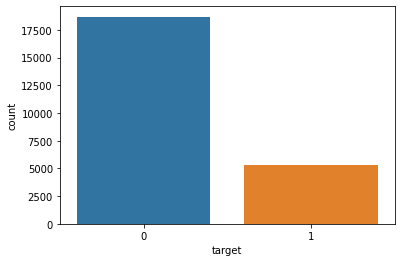

In [15]:
sns.countplot(y_train)


In [34]:
#SMOTE (Resampling the minority class. The strategy can be changed as required.)
from imblearn.over_sampling import SMOTE
sm = SMOTE(sampling_strategy='minority', random_state=101)
# Fit the model to generate the data.
X_train,y_train = sm.fit_resample(X_train,y_train)

In [35]:
y_train.value_counts()

0    18691
1    18691
Name: target, dtype: int64

####Check correlation between features 

Text(0.5, 1.0, 'correlation features heatmap')

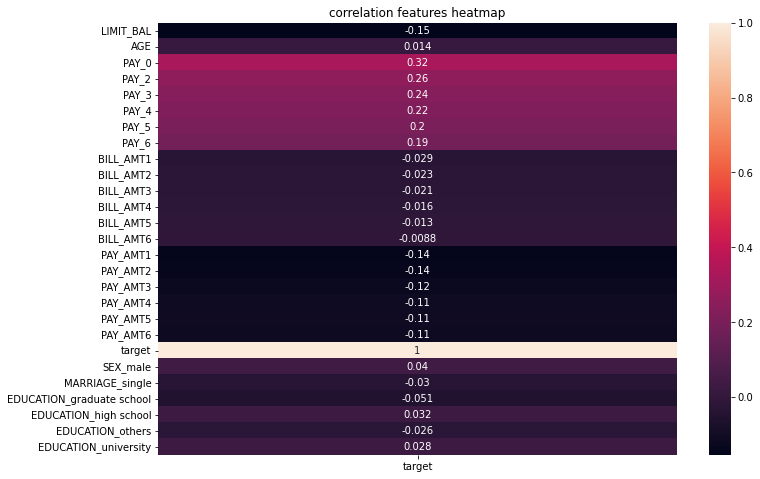

In [18]:
fig = plt.figure()
ax = fig.add_axes([0,0,1.5,1.5])
sns.heatmap(df.corr()[["target"]], annot= True).set_title("correlation features heatmap")

##start train

LR: 0.589085 (0.009247)
LDA: 0.789192 (0.006707)
KNN: 0.745921 (0.007718)
DT: 0.795345 (0.007656)
NB: 0.627341 (0.009282)
SVM: 0.635634 (0.010038)
RF: 0.867576 (0.004726)


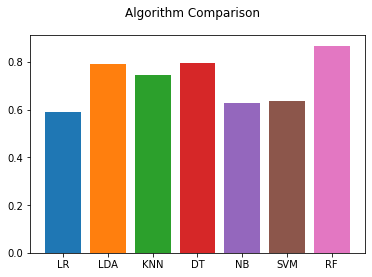

In [28]:
#train different algorithms to choose best one
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('RF', RandomForestClassifier()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
 kfold = model_selection.KFold(n_splits=10, random_state=101,shuffle= True)
 cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
 results.append(cv_results)
 names.append(name)
 msg = "%s: %f (%f)" % (name, cv_results.max(), cv_results.std())#try convert .mean() to .max()
 print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
for i in range( len(results)):
  plt.bar(names[i],results[i].max())
ax.set_xticklabels(names)
plt.show()

###Random Forest

In [36]:
#Random Forest give use best result so we will use that 
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [37]:
rf.score(X_train,y_train)

0.9994649831469691

####Train Evaluation

In [21]:
predictions=rf.predict(X_train)
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_train,predictions))
print('MSE:', metrics.mean_squared_error(y_train, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, predictions)))

MAE: 0.00048151516772778344
MSE: 0.00048151516772778344
RMSE: 0.021943453869611853


In [22]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_train,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18691
           1       1.00      1.00      1.00     18691

    accuracy                           1.00     37382
   macro avg       1.00      1.00      1.00     37382
weighted avg       1.00      1.00      1.00     37382



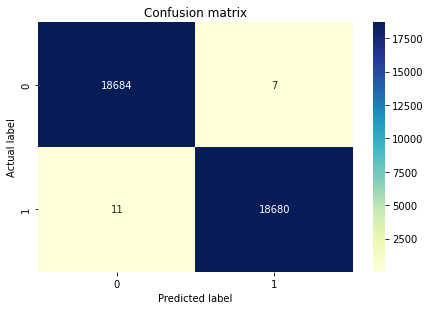

In [23]:
from sklearn.metrics import classification_report,confusion_matrix

cf_matrix = confusion_matrix(y_train,predictions)
sns.heatmap(pd.DataFrame(cf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

###Tuning the hyper-parameters of Random Forest

In [34]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators': [50], 
              'criterion': ['entropy', 'gini'], 
              'bootstrap': [True], 
              'max_depth': [6], 
              'max_features': ['auto','sqrt'], 
              'min_samples_leaf': [2, 3, 5], 
              'min_samples_split': [2, 3, 5]} 
                                   
scoring_metric='recall' 
best_rf = GridSearchCV(RandomForestClassifier(), param_grid = param_grid, scoring = scoring_metric, cv = 5, verbose = False, n_jobs = -1) 
best_rf.fit(X_train, y_train)
best_rf.score(X_train,y_train)

0.6955219089401317

In [35]:
predictions=best_rf.predict(X_train)
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_train,predictions))
print('MSE:', metrics.mean_squared_error(y_train, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, predictions)))

MAE: 0.21729709485848805
MSE: 0.21729709485848805
RMSE: 0.46615136475021507


##Test Evaluation

In [38]:
predictions=rf.predict(X_test)
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test,predictions))
print('MSE:', metrics.mean_squared_error(y_test,predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,predictions)))

MAE: 0.19
MSE: 0.19
RMSE: 0.43588989435406733


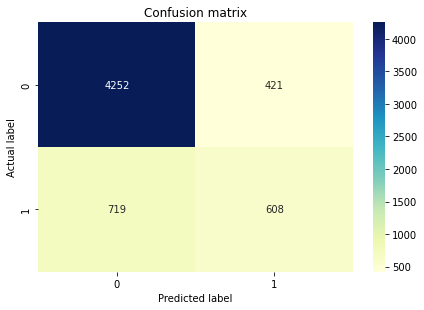

In [39]:
from sklearn.metrics import classification_report,confusion_matrix

cf_matrix = confusion_matrix(y_test,predictions)
sns.heatmap(pd.DataFrame(cf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [40]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.86      0.91      0.88      4673
           1       0.59      0.46      0.52      1327

    accuracy                           0.81      6000
   macro avg       0.72      0.68      0.70      6000
weighted avg       0.80      0.81      0.80      6000



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


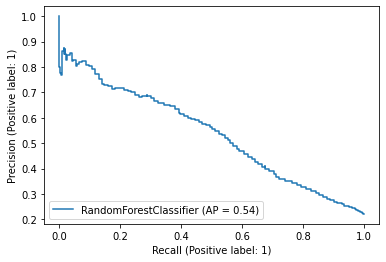

In [41]:
from sklearn.metrics import plot_precision_recall_curve
disp = plot_precision_recall_curve(rf, X_test, y_test)
